In [14]:
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt  

In [13]:
#데이터 불러오기
iris=datasets.load_iris()

### Sepal- target 관계 시각화

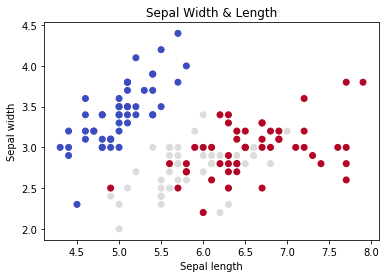

In [15]:
#sepal.length, sepal.width와 대상 클래스 시각화 위해서 함수 만들기
def visualize_sepal():
    X=iris.data[:,:2] #sepal.length, sepal.width 두 개의 피쳐를 x에 저장.
    y=iris.target #y에는 목표값을 저장
    plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Sepal Width & Length')
    plt.show()
visualize_sepal()

### Petal - target 관계 시각화

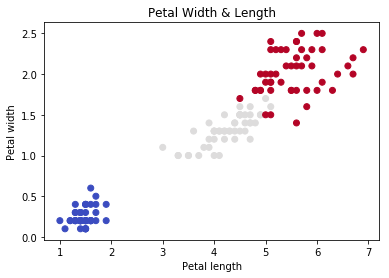

In [16]:
#petal의 경우에도 sepal과 동일하게 실행한다.
def visualize_petal():
    X=iris.data[:,2:]
    y=iris.target
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Petal Width & Length')
    plt.show()
visualize_petal()

### sepal svm 분류기 모델링

In [17]:
X=iris.data[:,:2] #sepal length와 width를 x에 저장.
y=iris.target #목표 값은 역시 y에 저장.
C=1.0

#svc with linear kenel
svc=svm.SVC(kernel='linear',C=C).fit(X,y)
#linearSVC
lin_svc=svm.LinearSVC(C=C).fit(X,y)
#svc with RBF kernel
rbf_svc=svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,y)
#svc with polynomial kernel
poly_svc=svm.SVC(kernel='poly',degree=3,C=C).fit(X,y)


### 모델링 된 svm 분류기 시각화

C:\Users\eunse\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


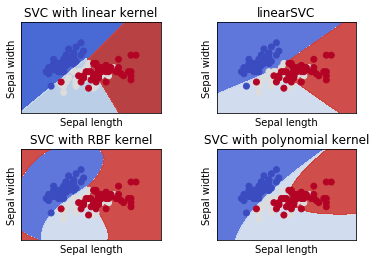

In [27]:
h=0.01

xmin,xmax=X[:,0].min() -1, X[:,0].max() +1
ymin,ymax=X[:,1].min() -1, X[:,1].max() +1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h),np.arange(ymin, ymax, h))

titles=['SVC with linear kernel',
       'linearSVC', 'SVC with RBF kernel', 'SVC with polynomial kernel']

for i, clf in enumerate((svc, lin_svc,rbf_svc,poly_svc)):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.coolwarm,alpha=0.8)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

#### 그래프를 통해 각 커널들이 어떻게 다른지 알 수 있습니당.
Petal도 해 보겠습니다.

### Petal svm 분류기 모델링

In [10]:
X=iris.data[:,2:] #위에꺼랑 코드가 유사해 보이지만, petal을 x에 저장한다는 차이점이 있음.
y=iris.target
C=1.0

svc=svm.SVC(kernel='linear',C=C).fit(X,y)
lin_svc=svm.LinearSVC(C=C).fit(X,y)
rbf_svc=svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,y)
poly_svc=svm.SVC(kernel='poly',degree=3,C=C).fit(X,y)

### 역시 시각화

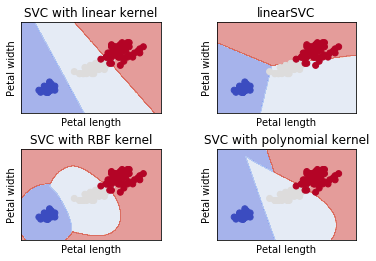

In [12]:
h=0.02

xmin,xmax = X[:,0].min()-1, X[:,0].max()+1
ymin,ymax = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

titles=['SVC with linear kernel', 'linearSVC',
       'SVC with RBF kernel', 'SVC with polynomial kernel']
for i, clf in enumerate((svc,lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.coolwarm,alpha=0.5)
    
    plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
plt.show()
    